In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
INPUT_FILE_HTTP3 = 'selenium_http3_results.csv'
INPUT_FILE_HTTP2 = 'selenium_http2_results.csv'

In [26]:
df_http3 = pd.read_csv(INPUT_FILE_HTTP3)
df_http2 = pd.read_csv(INPUT_FILE_HTTP2)

filtered_http3_urls = df_http3[df_http3['nextHopProtocol'] == 'h3']['url']
df_http3 = df_http3[df_http3['url'].isin(filtered_http3_urls)]
df_http2 = df_http2[df_http2['url'].isin(filtered_http3_urls)]

filtered_http2_urls = df_http2[df_http2['nextHopProtocol'] == 'h2']['url']
df_http2 = df_http2[df_http2['url'].isin(filtered_http2_urls)]
df_http3 = df_http3[df_http3['url'].isin(filtered_http2_urls)]

In [27]:
df_http3

,url,final_url,nextHopProtocol,responseStart,domInteractive,domComplete
0,https://www.google.com,https://www.google.com/,h3,129.6,220.0,518.2
1,https://www.facebook.com,https://www.facebook.com/login/?next=https%3A%...,h3,323.0,539.3,729.5
2,https://www.youtube.com,https://www.youtube.com/,h3,66.2,1636.9,2007.0
3,https://www.googleapis.com,https://www.googleapis.com/,h3,120.1,138.6,170.1
4,https://www.instagram.com,https://www.instagram.com/,h3,134.9,336.5,392.0
...,...,...,...,...,...,...
989,https://www.google.md,https://www.google.md/,h3,141.3,236.7,541.8
990,https://www.google.com.ai,https://www.google.com.ai/,h3,309.7,608.0,904.8
992,https://www.google.kg,https://www.google.kg/,h3,342.4,546.4,839.2
993,https://www.google.com.jm,https://www.google.com.jm/,h3,310.9,581.1,877.2


In [28]:
df_http2

,url,final_url,nextHopProtocol,responseStart,domInteractive,domComplete
0,https://www.google.com,https://www.google.com/,h2,265.2,505.6,799.8
1,https://www.facebook.com,https://www.facebook.com/login/?next=https%3A%...,h2,178.9,413.0,606.2
2,https://www.youtube.com,https://www.youtube.com/,h2,71.7,1412.7,1813.2
3,https://www.googleapis.com,https://www.googleapis.com/,h2,127.8,147.3,184.5
4,https://www.instagram.com,https://www.instagram.com/,h2,82.6,260.3,653.7
...,...,...,...,...,...,...
988,https://www.google.md,https://www.google.md/,h2,138.4,227.5,566.6
989,https://www.google.com.ai,https://www.google.com.ai/,h2,257.8,463.4,771.6
991,https://www.google.kg,https://www.google.kg/,h2,281.0,488.1,780.1
992,https://www.google.com.jm,https://www.google.com.jm/,h2,276.7,492.8,796.4


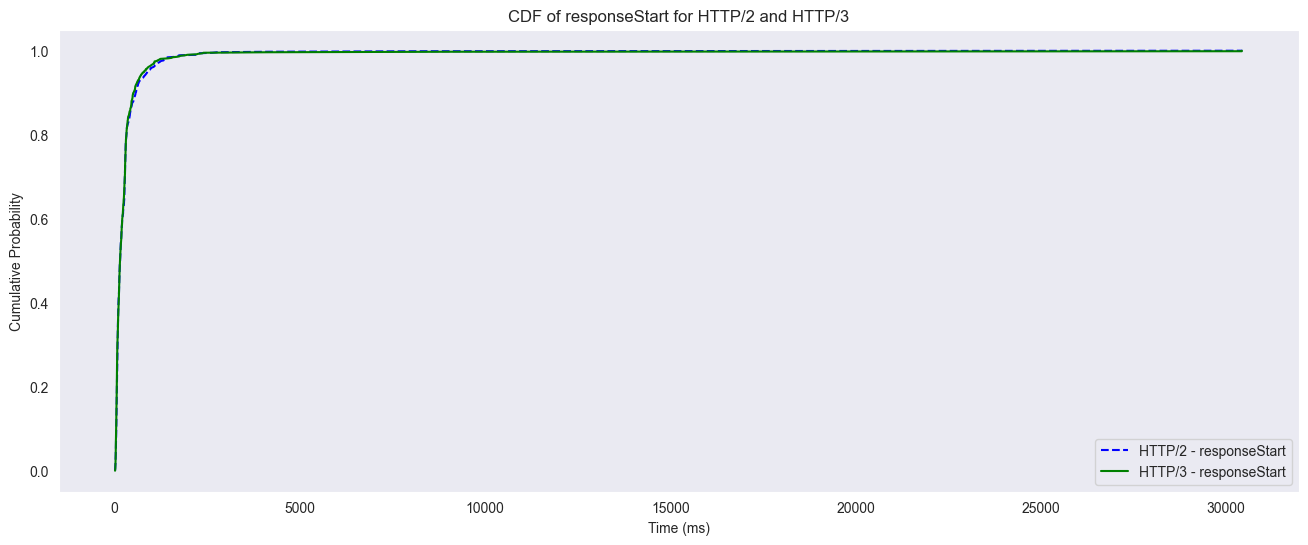

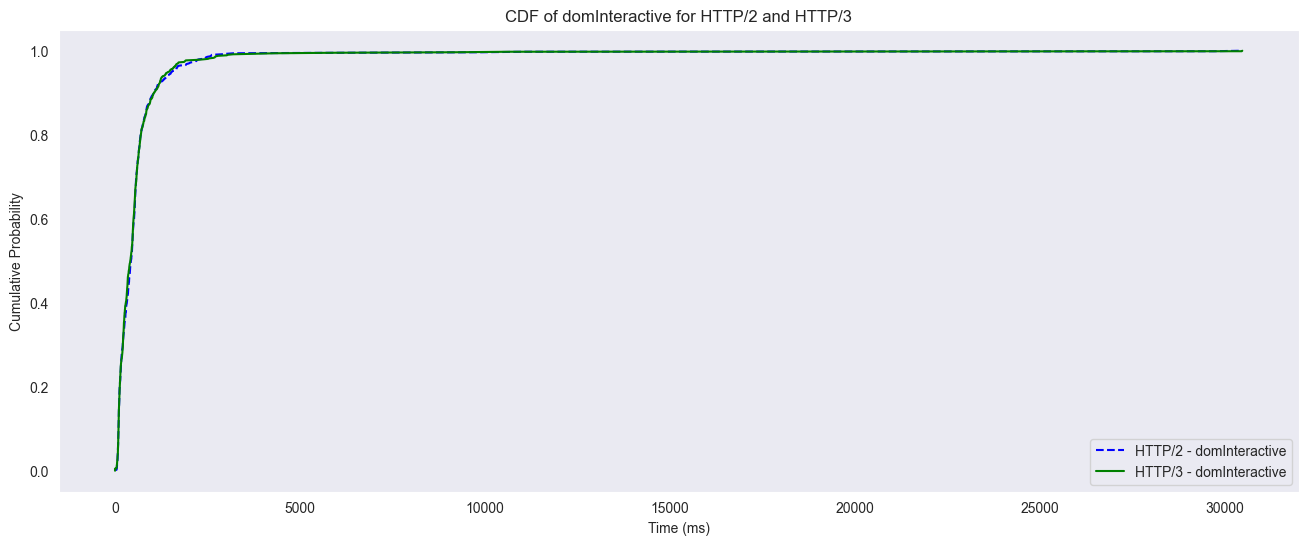

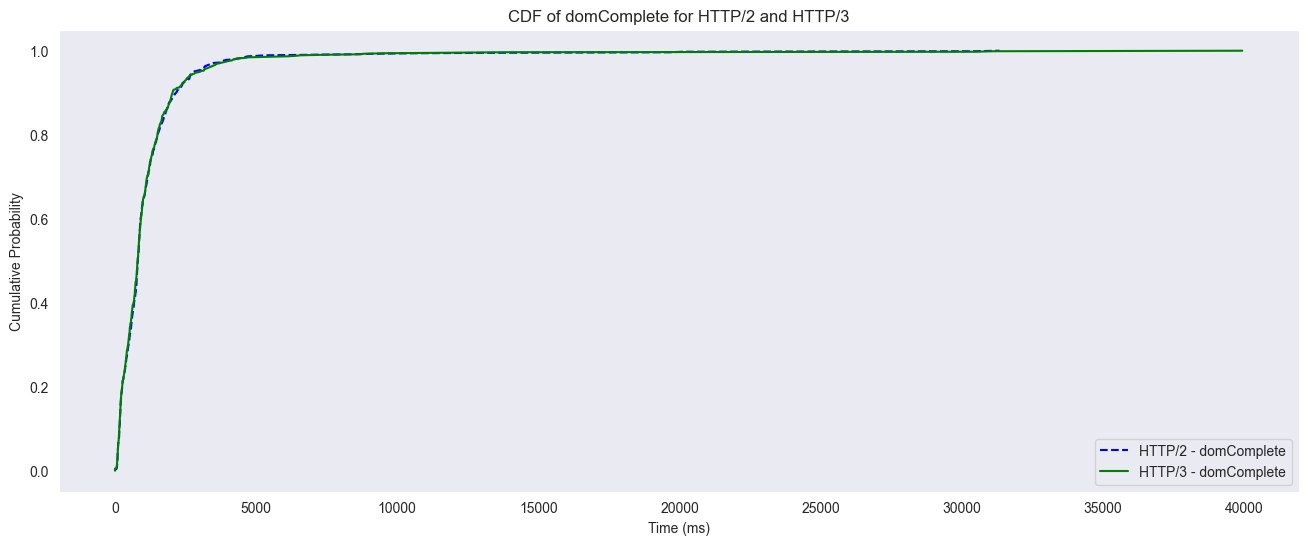

In [29]:
metrics = ['responseStart', 'domInteractive', 'domComplete']

for metric in metrics:
    plt.figure(figsize=(16, 6))

    sorted_http2 = np.sort(df_http2[metric])
    cdf_http2 = np.arange(len(sorted_http2)) / float(len(sorted_http2) - 1)
    plt.plot(sorted_http2, cdf_http2, linestyle='--', color='blue', label=f"HTTP/2 - {metric}")

    sorted_http3 = np.sort(df_http3[metric])
    cdf_http3 = np.arange(len(sorted_http3)) / float(len(sorted_http3) - 1)
    plt.plot(sorted_http3, cdf_http3, linestyle='-', color='green', label=f"HTTP/3 - {metric}")

    plt.title(f"CDF of {metric} for HTTP/2 and HTTP/3")
    plt.xlabel("Time (ms)")
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.grid()
    plt.show()

In [17]:
def calculate_percentiles(data, percentiles):
    results = {}
    for metric in metrics:
        results[metric] = {f"{p}th Percentile": np.percentile(data[metric], p) for p in percentiles}
    return results

percentiles = [10, 50, 90]

In [30]:
http2_percentiles = pd.DataFrame(calculate_percentiles(df_http2, percentiles))
http3_percentiles = pd.DataFrame(calculate_percentiles(df_http3, percentiles))
percentile_diff = http2_percentiles - http3_percentiles
percentile_diff

,responseStart,domInteractive,domComplete
10th Percentile,2.60,-0.775,5.995
50th Percentile,1.90,17.700,5.700
90th Percentile,60.55,-7.900,126.800
